# Jballard California Housing Price Prediction
**Author:** Jaosn Ballard  
**Date:** March 12, 2025
**Objective:** Predict the median house price in California using available housing features.


## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [ ]:
# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
# import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

In [ ]:
# This is a Python cell. 
# Put your comments and code here. 
# Read the Markdown cell above for information and example code. 
#
# For example:

# Load the data
data = fetch_california_housing(as_frame=True)
df = data.frame

# Might be large. Display just the first 10 rows (you can change this number)
df.head(10)


### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

In [ ]:
# This is a Python cell. 
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Count missing values in each column
df.isnull().sum()


Analysis: 

1) How many data instances (also called data records or data rows) are there? _20639_

2) How many features (also columns or attributes) are there? _eight  (8)_

3) What are the names of the features? ("Feature" is used most often in ML projects.) _MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, and MedHouseVal_ 

4) Which features are numeric? _All of the features are numeric_

5) Which features are categorical (non-numeric)? _All of the features are numeric_

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value? _This depends on the metric that come out of the accuracy of the model. This data set is not missing any data._

7) What else do you notice about the dataset? Are there any data issues? _I don't notice anything apparently concerning with the dataset_

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

#### 2.1.1 Histogram

Generate histograms for all numerical columns

In [ ]:
# Histograms for all numerical columns
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()




#### 2.1.2 Generate one Boxenplot for each column (good for large datasets)

In [ ]:
# Generate a Boxen plot for each column
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

#### 2.1.3- Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

In [ ]:
# Generate pairplot for all numerical columns (Warning: Can be slow for large datasets)
sns.pairplot(df, diag_kind="kde", plot_kws={'alpha':0.5})

plt.show()


## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame

In [25]:
# Define contributing features (predictors)
features: list = ['MedInc', 'AveRooms']

# Define the target variable (what we want to predict)
target: str = 'MedHouseVal'

# Create input (X) and output (y) DataFrames
df_X = df[features]  # Feature matrix (capital X)
df_y = df[target]    # Target vector (lowercase y)



#### Analysis: 



## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)

In [16]:
# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=123
)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 2)
X_test shape: (4128, 2)
y_train shape: (16512,)
y_test shape: (4128,)


#### Analysis
X_train and X_test: **2D arrays** (feature matrix) with 2 columns (features).

y_train and y_test: **1D arrays** (target values) with one column (house prices).

Split ratio: **80%** for training, **20%** for testing.

Total dataset size: 20,640 rows split into training (16,512 rows) and testing (4,128 rows).


### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.

In [17]:
# Create an instance of the LinearRegression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Print the learned coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.43401806 -0.03649133]
Intercept: 0.5876013503635489


#### Analysis
Intercept (0.5876) → Baseline house price when MedInc and AveRooms are zero (theoretically).
Coefficient for MedInc (0.4340) → **Higher income increases house price.**
Coefficient for AveRooms (-0.0365) → **More rooms slightly decrease house price.**


### 4.3 Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first 10 predicted values
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: [2.05227796 2.12127503 2.1663473  1.43558758 2.30001065 2.48790324
 1.29601656 2.29005608 1.80207728 1.32660676]


#### Analysis
The first 10 predictions are house price estimates based on MedInc and AveRooms.
The values likely represent home prices in $100,000s.
The accuracy can be evaluated by comparing them to y_test. (Free assisitant receommendation - see below)
Model improvements include adding features, testing different regression models, and tuning hyperparameters.

Actual: 1.52, Predicted: 2.05
Actual: 0.99, Predicted: 2.12
Actual: 1.34, Predicted: 2.17
Actual: 2.32, Predicted: 1.44
Actual: 4.63, Predicted: 2.30
Actual: 1.41, Predicted: 2.49
Actual: 1.70, Predicted: 1.30
Actual: 1.60, Predicted: 2.29
Actual: 1.02, Predicted: 1.80
Actual: 1.69, Predicted: 1.33


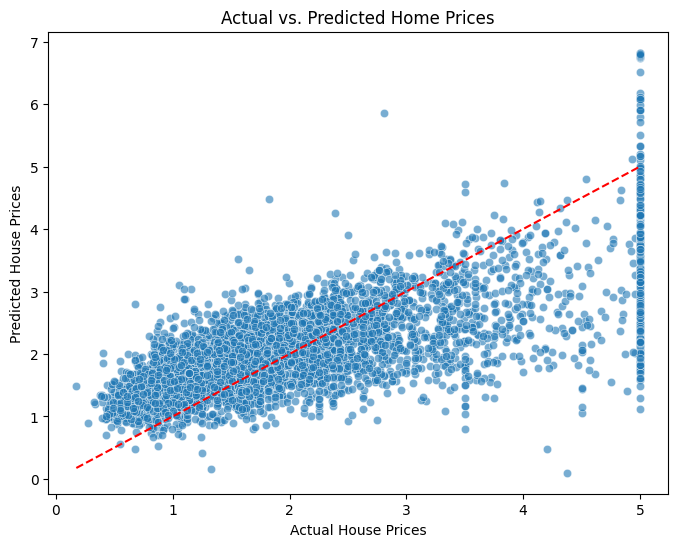

In [21]:
# Compare predictions to actual values (print first 10 values)
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.2f}, Predicted: {predicted:.2f}')

# Create scatter plot for full dataset (after the loop)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot a perfect prediction line (ideal case where y_test == y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.show()


### 4.4 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

#### 4.4.1 
- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.

In [22]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'R²: {r2:.2f}')


R²: 0.48


#### Analysis
The R^2 of 48% variation tells me that the model could use some refinement

#### 4.4.2

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.

In [23]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')


MAE: 0.62


#### Analysis
This error equates to 62,000 which is a significant margin

#### 4.4.3

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

In [24]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

RMSE: 0.83


#### Analysis 
this shows that the model deviates 83,000 with an impact on outliers since the RMSE is larger than the MAE